<a href="https://colab.research.google.com/github/GabrielMtzSoltero/SSPIAII/blob/main/autoregresores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

         Date  Temp
0  1981-01-01  20.7
1  1981-01-02  17.9
2  1981-01-03  18.8
3  1981-01-04  14.6
4  1981-01-05  15.8


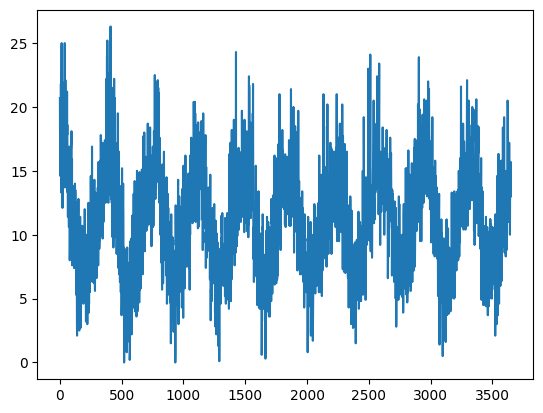

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
import pickle


data = pd.read_csv('daily-min-temperatures.csv')
print(data.head())
x = np.asanyarray(data[['Temp']])
plt.plot(x)



In [78]:
outputs=x[1:]
inputs=x[:-1]

#creamos el objeto para realizar la regresion lineal
lin_reg = MLPRegressor()
#entrenamos con nuestros datos de entrada y salida
lin_reg.fit(inputs,outputs.ravel())
print(lin_reg.score(inputs,outputs))
y_new = lin_reg.predict([[23]])
print(y_new)

filename = 'tempe1Entradas.pkl'
pickle.dump(lin_reg, open(filename, 'wb'))

0.6005886756398336
[20.37843407]


In [79]:
listInputs=[]
listOutputs=[]
x = np.asanyarray(data[['Temp']])
valoresAnteriores=5
for i in range(valoresAnteriores,len(x)):
    entrada=np.reshape(x[i-valoresAnteriores:i],-1)
    listInputs.append(entrada)
    listOutputs.append(x[i])
listInputs=np.asanyarray(listInputs)
listOutputs=np.asanyarray(listOutputs).ravel()
lin_reg.fit(listInputs,listOutputs)

print(lin_reg.score(listInputs,listOutputs))

#y_new = lin_reg.predict([[20,25,30,30,30,30,29,28,27,26,26]])
y_new = lin_reg.predict([[20,25,30,30,30]])
filename = "tempe"+str(valoresAnteriores)+"Entradas.pkl"
pickle.dump(lin_reg, open(filename, 'wb'))

0.6420986242129624
